In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/drive/MyDrive/works & studies/my_shared_drive/Projects/airbnb_data_analysis/airbnb_open_data.csv', encoding='latin-1', low_memory=False, on_bad_lines='skip')

In [9]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [11]:
df.shape

(102593, 26)

In [12]:
# checking if there's any missing values
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102593 entries, 0 to 102592
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102593 non-null  int64  
 1   NAME                            102343 non-null  object 
 2   host id                         102593 non-null  int64  
 3   host_identity_verified          102304 non-null  object 
 4   host name                       102187 non-null  object 
 5   neighbourhood group             102564 non-null  object 
 6   neighbourhood                   102577 non-null  object 
 7   lat                             102585 non-null  float64
 8   long                            102585 non-null  float64
 9   country                         102061 non-null  object 
 10  country code                    102462 non-null  object 
 11  instant_bookable                102488 non-null  object 
 12  cancellation_pol

In [14]:
# handling missing values
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102593 entries, 0 to 102592
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102593 non-null  int64         
 1   NAME                            102343 non-null  object        
 2   host id                         102593 non-null  int64         
 3   host_identity_verified          102304 non-null  object        
 4   host name                       102187 non-null  object        
 5   neighbourhood group             102564 non-null  object        
 6   neighbourhood                   102577 non-null  object        
 7   lat                             102585 non-null  float64       
 8   long                            102585 non-null  float64       
 9   country                         102061 non-null  object        
 10  country code                    102462 non-null  object 

In [17]:
df.fillna({'reviews per month' : 0, 'last review': df['last review'].min()}, inplace=True)

In [18]:
df.dropna(subset=['NAME', 'host name'], inplace=True)

In [19]:
print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [20]:
# dropping the last 2 columns
df = df.drop(columns=['house_rules', 'license'], errors = 'ignore')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101943 entries, 0 to 102592
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101943 non-null  int64         
 1   NAME                            101943 non-null  object        
 2   host id                         101943 non-null  int64         
 3   host_identity_verified          101667 non-null  object        
 4   host name                       101943 non-null  object        
 5   neighbourhood group             101917 non-null  object        
 6   neighbourhood                   101927 non-null  object        
 7   lat                             101935 non-null  float64       
 8   long                            101935 non-null  float64       
 9   country                         101417 non-null  object        
 10  country code                    101821 non-null  object      

In [22]:
# removing the $ sign and converting the price and service_fee into float
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].str.replace('[\$,]', '', regex=True).astype(float)

In [23]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [24]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101404 entries, 0 to 102051
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101404 non-null  int64         
 1   NAME                            101404 non-null  object        
 2   host id                         101404 non-null  int64         
 3   host_identity_verified          101128 non-null  object        
 4   host name                       101404 non-null  object        
 5   neighbourhood group             101378 non-null  object        
 6   neighbourhood                   101388 non-null  object        
 7   lat                             101396 non-null  float64       
 8   long                            101396 non-null  float64       
 9   country                         100878 non-null  object        
 10  country code                    101282 non-null  object      

In [26]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014040e+05,1.014040e+05,101396.000000,101396.000000,101204.000000,101165.000000,101136.000000,101010.000000,101222.000000,101404,101404.000000,101097.000000,101086.000000,100984.000000
mean,2.920931e+07,4.926225e+10,40.728082,-73.949669,2012.486957,625.385598,125.044920,8.113573,27.511974,2018-05-15 19:35:09.502584064,1.163218,3.278584,7.948697,141.163689
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507491e+07,2.459409e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922746e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328390e+07,7.399769e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626863e+07,2.853689e+10,0.055851,0.049468,5.765214,331.611201,66.313799,30.378808,49.549581,NaN,1.683749,1.285384,32.329906,135.420450


### Data Visualization

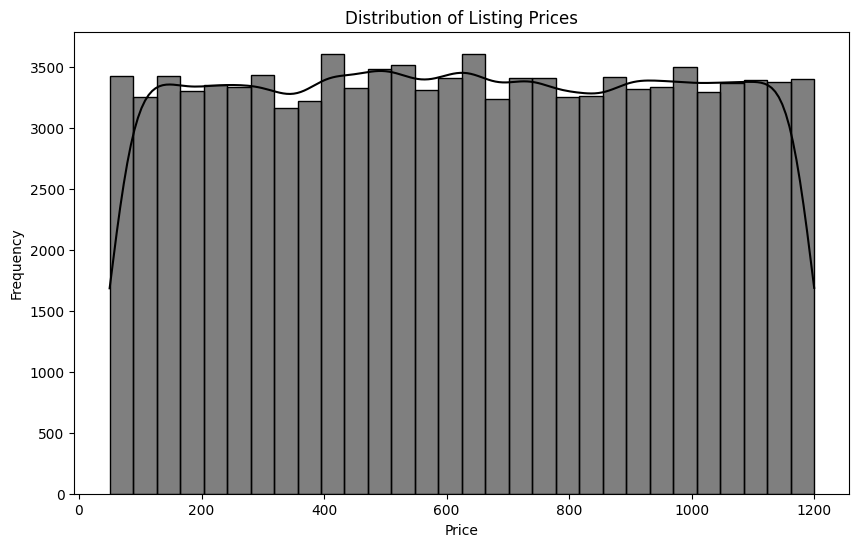

In [28]:
# distribution of listing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='black')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-86415738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room type', data=df, palette='viridis')


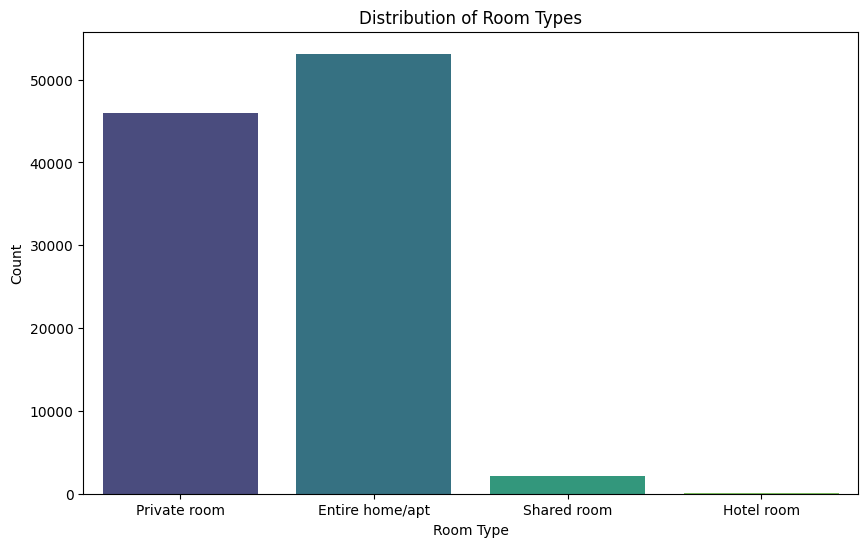

In [29]:
# distribution of different room types
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', data=df, palette='viridis')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2832674687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighbourhood group', data=df, palette='viridis', order=df['neighbourhood group'].value_counts().index)


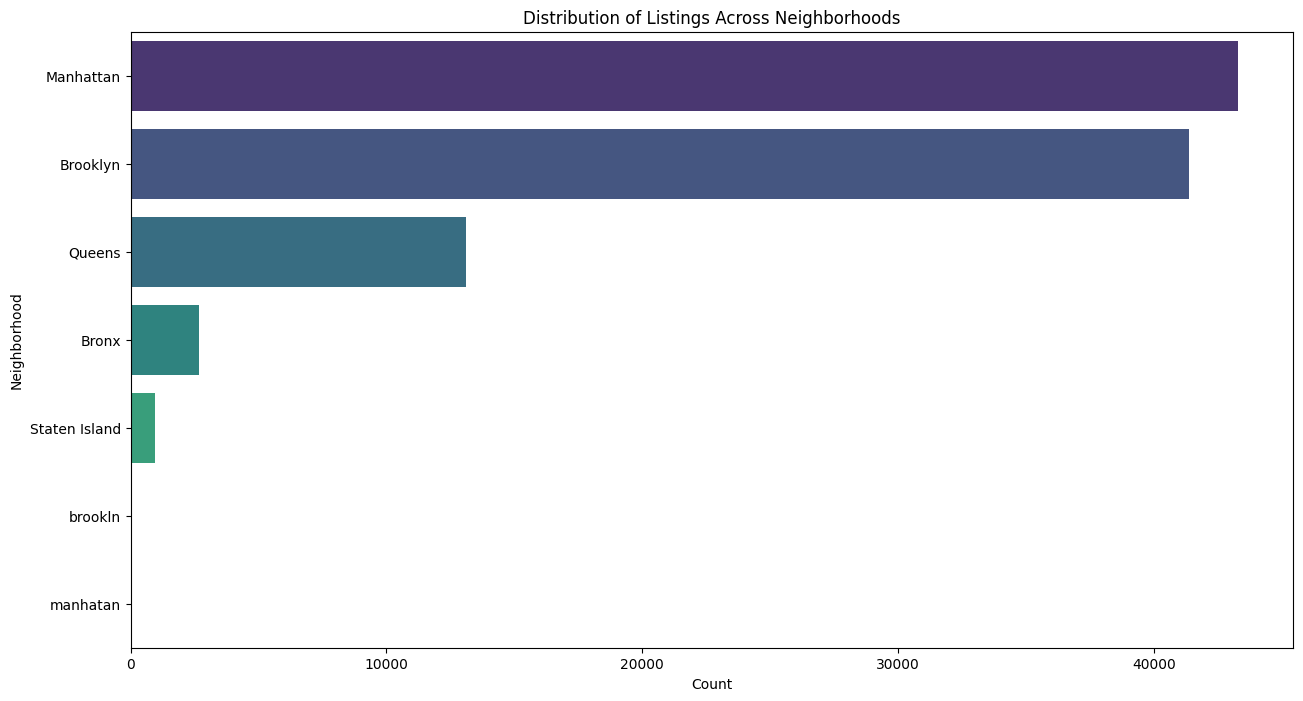

In [31]:
# distribution listings across different neighborhoods
plt.figure(figsize=(15, 8))
sns.countplot(y='neighbourhood group', data=df, palette='viridis', order=df['neighbourhood group'].value_counts().index)
plt.title('Distribution of Listings Across Neighborhoods')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

/tmp/ipython-input-1009444807.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Room Type')


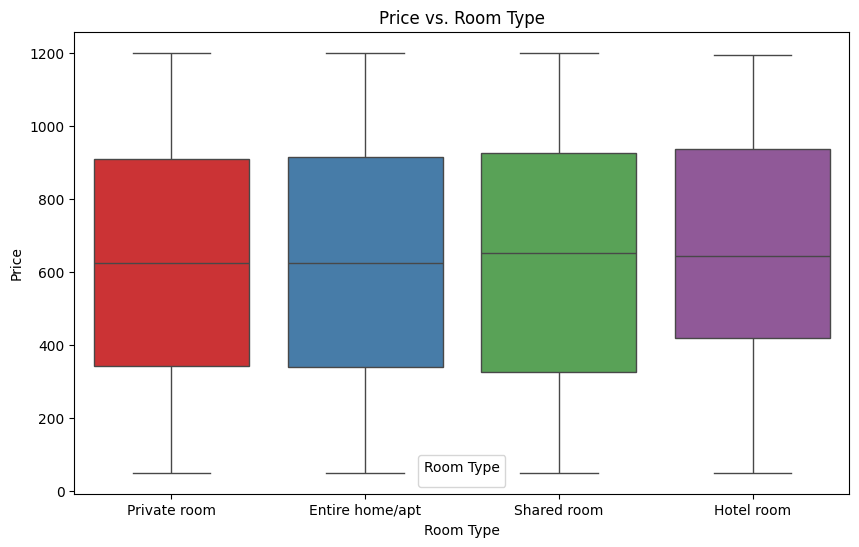

In [33]:
# relationships between price and room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', hue='room type',data=df, palette='Set1')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

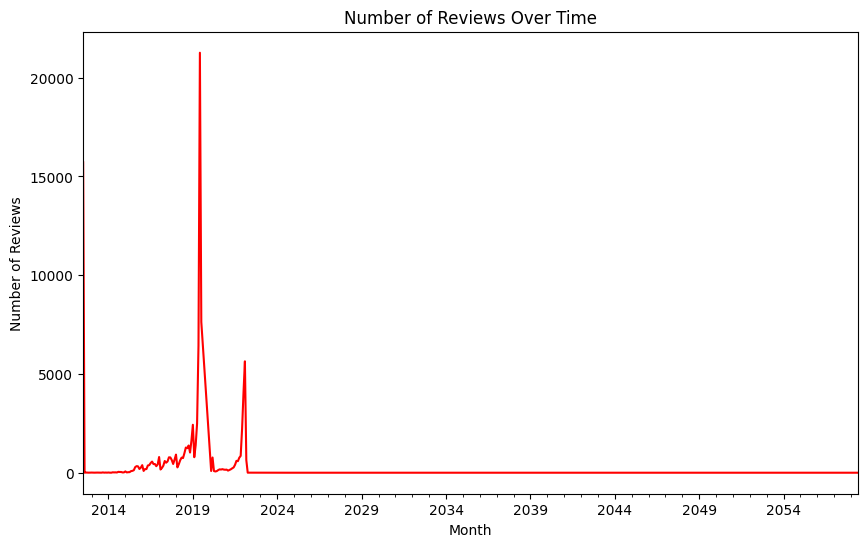

In [35]:
# how has the number of reviews change over with time
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
reviews_over_time.plot(kind='line', color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()